In [2]:
!pip install bs4
import pandas as pd
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
import re
!pip install folium
import folium
!pip install geopy
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize 
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1272 sha256=031da43cda361065a4d0cb4190d4d93f7bb416af80fc9258368dcac4b0d0926a
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.

In [3]:
# Define credentials for four square APIs -
CLIENT_ID = 'UL2OLKO4GNGFHM1XAZ3224IRCB04UYZSIE2F3U2FZSC3EZCK' # your Foursquare ID
CLIENT_SECRET = 'JQRRHS3H2IS2QJYRRFDHJC1IJB3IUDGNUTUMFSE4RRZNCIGH' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UL2OLKO4GNGFHM1XAZ3224IRCB04UYZSIE2F3U2FZSC3EZCK
CLIENT_SECRET:JQRRHS3H2IS2QJYRRFDHJC1IJB3IUDGNUTUMFSE4RRZNCIGH


In [4]:
# Define Opentrip map API credentials -
API_KEY = "5ae2e3f221c38a28845f05b6d1bbd2ce6b0be6624262f41d784ffc0f"
RADIUS_TRIP = "50000"
print('Your API key: ' + API_KEY)

Your API key: 5ae2e3f221c38a28845f05b6d1bbd2ce6b0be6624262f41d784ffc0f


Using OpenTrip map API, first we get the tourist attrastions in Wayanad, in upto a radius of 50 Km.

In [5]:
tour_url = 'https://api.opentripmap.com/0.1/en/places/radius?radius={}&lon=76.0830&lat=11.6050&kinds=interesting_places%2Csport%2Camusements&apikey={}'.format(
            RADIUS_TRIP, 
            API_KEY)
tour_url

'https://api.opentripmap.com/0.1/en/places/radius?radius=50000&lon=76.0830&lat=11.6050&kinds=interesting_places%2Csport%2Camusements&apikey=5ae2e3f221c38a28845f05b6d1bbd2ce6b0be6624262f41d784ffc0f'

In [6]:
tour_results = requests.get(tour_url).json()
#tour_results

Extract the json results of tourist attraction information into a dataframe.

In [7]:
df_tour = pd.json_normalize(tour_results['features'])
df_tour.head()

,type,id,geometry.type,geometry.coordinates,properties.xid,properties.name,properties.dist,properties.rate,properties.osm,properties.kinds,properties.wikidata
0,Feature,3166861,Point,"[76.083572, 11.604065]",N6359513685,Kotyaram appartment,120.703121,1,node/6359513685,"other,unclassified_objects,interesting_places,...",NaN
1,Feature,5073077,Point,"[76.083336, 11.608716]",N5273501622,,412.657264,0,node/5273501622,"religion,other_temples,interesting_places",NaN
2,Feature,8458524,Point,"[76.112434, 11.61166]",N3922107501,,3293.887771,0,node/3922107501,"mountain_peaks,interesting_places,natural,geol...",NaN
3,Feature,4941571,Point,"[76.066681, 11.62992]",W484312073,,3281.125197,0,way/484312073,"religion,hindu_temples,interesting_places",NaN
4,Feature,8458533,Point,"[76.112991, 11.618408]",N3922107503,,3591.554451,0,node/3922107503,"mountain_peaks,interesting_places,natural,geol...",NaN


Lets clean this dataframe.

In [8]:
# Lets have only the columsnthat are needed
df_tour = df_tour[["geometry.coordinates","properties.name","properties.dist","properties.rate","properties.kinds"]]
df_tour.head()

,geometry.coordinates,properties.name,properties.dist,properties.rate,properties.kinds
0,"[76.083572, 11.604065]",Kotyaram appartment,120.703121,1,"other,unclassified_objects,interesting_places,..."
1,"[76.083336, 11.608716]",,412.657264,0,"religion,other_temples,interesting_places"
2,"[76.112434, 11.61166]",,3293.887771,0,"mountain_peaks,interesting_places,natural,geol..."
3,"[76.066681, 11.62992]",,3281.125197,0,"religion,hindu_temples,interesting_places"
4,"[76.112991, 11.618408]",,3591.554451,0,"mountain_peaks,interesting_places,natural,geol..."


In [9]:
# Lets make the column names more relevant and presentable
df_tour_columns = ["Coordinates","Name","Distance from Wayanad","Rating","Kind of Place"]
df_tour.columns = df_tour_columns
df_tour.head()

,Coordinates,Name,Distance from Wayanad,Rating,Kind of Place
0,"[76.083572, 11.604065]",Kotyaram appartment,120.703121,1,"other,unclassified_objects,interesting_places,..."
1,"[76.083336, 11.608716]",,412.657264,0,"religion,other_temples,interesting_places"
2,"[76.112434, 11.61166]",,3293.887771,0,"mountain_peaks,interesting_places,natural,geol..."
3,"[76.066681, 11.62992]",,3281.125197,0,"religion,hindu_temples,interesting_places"
4,"[76.112991, 11.618408]",,3591.554451,0,"mountain_peaks,interesting_places,natural,geol..."


In [10]:
# Now lets rearrange the columns
rearrange_col = ["Name","Distance from Wayanad","Kind of Place","Rating","Coordinates"]
df_tour = df_tour.reindex(columns=rearrange_col)
df_tour.head()

,Name,Distance from Wayanad,Kind of Place,Rating,Coordinates
0,Kotyaram appartment,120.703121,"other,unclassified_objects,interesting_places,...",1,"[76.083572, 11.604065]"
1,,412.657264,"religion,other_temples,interesting_places",0,"[76.083336, 11.608716]"
2,,3293.887771,"mountain_peaks,interesting_places,natural,geol...",0,"[76.112434, 11.61166]"
3,,3281.125197,"religion,hindu_temples,interesting_places",0,"[76.066681, 11.62992]"
4,,3591.554451,"mountain_peaks,interesting_places,natural,geol...",0,"[76.112991, 11.618408]"


In [11]:
# Now lets sort the dataframe based on the ratings of the tourist attractions. 
df_tour.sort_values('Rating', ascending=False, inplace=True)
df_tour.head()

,Name,Distance from Wayanad,Kind of Place,Rating,Coordinates
331,Aralam Wildlife Sanctuary,36964.759218,"other,unclassified_objects,interesting_places,...",7,"[75.888603, 11.8788]"
86,Jain Temple,19279.164394,"religion,other_temples,interesting_places",7,"[76.250687, 11.660213]"
390,Mudumalai National Park/Tiger Reserve,42494.177762,"gardens_and_parks,urban_environment,cultural,i...",3,"[76.472389, 11.619125]"
34,Soochipara Falls,13480.166136,"waterfalls,interesting_places,natural,water",3,"[76.163101, 11.5122]"
386,Bandipur National Park/Tiger Reserve,42018.610136,"gardens_and_parks,urban_environment,cultural,i...",3,"[76.421936, 11.785826]"


In [12]:
# Lets remove the rows from the tour_df dataframe where the name of the place is null
df_tour = df_tour[df_tour['Name'].notna()]

In [13]:
df_tour.shape

(500, 5)

In [14]:
# Lets clean up the distance column a bit. We'll convert the distance which is currently in meters to kilometers, and round them up.
df_tour['Distance from Wayanad'] = df_tour['Distance from Wayanad']/1000
df_tour['Distance from Wayanad'] = round(df_tour['Distance from Wayanad'],2)
df_tour.rename(columns={"Distance from Wayanad":"Distance from Wayanad (in Km)"},inplace=True)

In [15]:
df_tour.head()

,Name,Distance from Wayanad (in Km),Kind of Place,Rating,Coordinates
331,Aralam Wildlife Sanctuary,36.96,"other,unclassified_objects,interesting_places,...",7,"[75.888603, 11.8788]"
86,Jain Temple,19.28,"religion,other_temples,interesting_places",7,"[76.250687, 11.660213]"
390,Mudumalai National Park/Tiger Reserve,42.49,"gardens_and_parks,urban_environment,cultural,i...",3,"[76.472389, 11.619125]"
34,Soochipara Falls,13.48,"waterfalls,interesting_places,natural,water",3,"[76.163101, 11.5122]"
386,Bandipur National Park/Tiger Reserve,42.02,"gardens_and_parks,urban_environment,cultural,i...",3,"[76.421936, 11.785826]"


In [16]:
# Next lets drop the places with rating = 0
df_tour.drop(df_tour[df_tour["Rating"] == 0].index, inplace=True)
df_tour.shape

(397, 5)

In [17]:
df_tour.head(3)

,Name,Distance from Wayanad (in Km),Kind of Place,Rating,Coordinates
331,Aralam Wildlife Sanctuary,36.96,"other,unclassified_objects,interesting_places,...",7,"[75.888603, 11.8788]"
86,Jain Temple,19.28,"religion,other_temples,interesting_places",7,"[76.250687, 11.660213]"
390,Mudumalai National Park/Tiger Reserve,42.49,"gardens_and_parks,urban_environment,cultural,i...",3,"[76.472389, 11.619125]"


In [18]:
df_tour.reset_index(inplace=True)

In [19]:
df_tour.head()

,index,Name,Distance from Wayanad (in Km),Kind of Place,Rating,Coordinates
0,331,Aralam Wildlife Sanctuary,36.96,"other,unclassified_objects,interesting_places,...",7,"[75.888603, 11.8788]"
1,86,Jain Temple,19.28,"religion,other_temples,interesting_places",7,"[76.250687, 11.660213]"
2,390,Mudumalai National Park/Tiger Reserve,42.49,"gardens_and_parks,urban_environment,cultural,i...",3,"[76.472389, 11.619125]"
3,34,Soochipara Falls,13.48,"waterfalls,interesting_places,natural,water",3,"[76.163101, 11.5122]"
4,386,Bandipur National Park/Tiger Reserve,42.02,"gardens_and_parks,urban_environment,cultural,i...",3,"[76.421936, 11.785826]"


In [20]:
#df_tour.drop("level_0",axis=1,inplace=True)

In [21]:
df_tour.head(2)

,index,Name,Distance from Wayanad (in Km),Kind of Place,Rating,Coordinates
0,331,Aralam Wildlife Sanctuary,36.96,"other,unclassified_objects,interesting_places,...",7,"[75.888603, 11.8788]"
1,86,Jain Temple,19.28,"religion,other_temples,interesting_places",7,"[76.250687, 11.660213]"


In [22]:
df_tour.drop("index",axis=1,inplace=True)

In [23]:
df_tour.head()

,Name,Distance from Wayanad (in Km),Kind of Place,Rating,Coordinates
0,Aralam Wildlife Sanctuary,36.96,"other,unclassified_objects,interesting_places,...",7,"[75.888603, 11.8788]"
1,Jain Temple,19.28,"religion,other_temples,interesting_places",7,"[76.250687, 11.660213]"
2,Mudumalai National Park/Tiger Reserve,42.49,"gardens_and_parks,urban_environment,cultural,i...",3,"[76.472389, 11.619125]"
3,Soochipara Falls,13.48,"waterfalls,interesting_places,natural,water",3,"[76.163101, 11.5122]"
4,Bandipur National Park/Tiger Reserve,42.02,"gardens_and_parks,urban_environment,cultural,i...",3,"[76.421936, 11.785826]"


In [24]:
# Let us also drop the column "Kind of Place"
df_tour.drop("Kind of Place", axis=1, inplace=True)

In [25]:
df_tour.shape

(397, 4)

In [26]:
# Currently the column "Coordinates" is a combination of latitude and longitude in a list. 
# Let us split it into tw separate columns and remove the column "Coordinates"
df_tour["Latitude"] = ""
df_tour["Longitude"] = ""
for index, row in df_tour.iterrows():
    df_tour.at[index, 'Longitude'] = row["Coordinates"][0]
    df_tour.at[index, 'Latitude'] = row["Coordinates"][1]
df_tour.drop("Coordinates",axis=1,inplace=True)

In [27]:
df_tour.head(3)

,Name,Distance from Wayanad (in Km),Rating,Latitude,Longitude
0,Aralam Wildlife Sanctuary,36.96,7,11.8788,75.8886
1,Jain Temple,19.28,7,11.6602,76.2507
2,Mudumalai National Park/Tiger Reserve,42.49,3,11.6191,76.4724


Next comes the part where we use Foursquare API to fets the nearest restaurant for each of the tourist attraction that we have identified in the dataframe df_tour.

In [28]:
address = 'Wayanad'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Wayanad are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Wayanad are 11.715219000000001, 76.12690294658198.


In [29]:
# Lets check for any null values in our dataframe
print(df_tour.isnull().values.any())
print(df_tour.shape)

False
(397, 5)


Next lets use kmeans clustering for clustering the geo spatial data and plot them on the map.

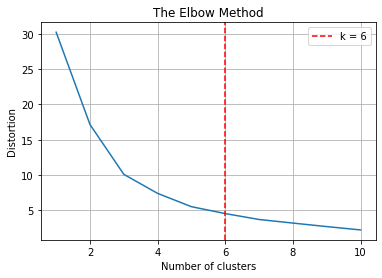

In [30]:
from sklearn import preprocessing, cluster
X = df_tour[["Latitude","Longitude"]]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

From the plot above it is indicative that k=6 is optimum.

In [32]:
# Lets add cluster label for each entry
kmeans = KMeans(n_clusters = 6, init ='k-means++')
kmeans.fit(df_tour[["Latitude","Longitude"]]) # Compute k-means clustering.
df_tour['Cluster Label'] = kmeans.fit_predict(df_tour[["Latitude","Longitude"]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(df_tour[["Latitude","Longitude"]]) # Labels of each point
df_tour.head(10)

,Name,Distance from Wayanad (in Km),Rating,Latitude,Longitude,Cluster Label
0,Aralam Wildlife Sanctuary,36.96,7,11.8788,75.8886,2
1,Jain Temple,19.28,7,11.6602,76.2507,0
2,Mudumalai National Park/Tiger Reserve,42.49,3,11.6191,76.4724,0
3,Soochipara Falls,13.48,3,11.5122,76.1631,0
4,Bandipur National Park/Tiger Reserve,42.02,3,11.7858,76.4219,0
5,Makkiyad Meenmutty,25.23,3,11.7266,75.8872,3
6,Banasura Hill,21.48,3,11.6942,75.9081,3
7,Irupu Falls,41.45,3,11.9668,75.9839,2
8,St. Marys Church Meenangadi,11.01,3,11.6593,76.1676,0
9,Chembra peak,10.28,3,11.5123,76.0896,5


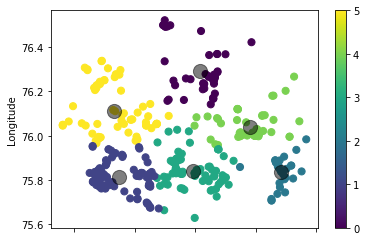

In [33]:
df_tour.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [34]:
kmeans.cluster_centers_.tolist()

[[11.6172938, 76.29304644],
 [11.349331711538461, 75.81403633653846],
 [11.88428496551724, 75.83569151724139],
 [11.591959670731708, 75.84307254878048],
 [11.780418793650794, 76.03879361904762],
 [11.331165014492754, 76.11182724637682]]

In [37]:
# Lets now plot the clusters on the map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9)

# set color scheme for the clusters
x = np.arange(k)
ys = [i+x+(i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_tour['Latitude'], df_tour['Longitude'], df_tour['Name'], df_tour['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker([lat, lon],
                        radius=5,
                        popup=label,
                        color=rainbow[cluster-1],
                        fill=True,
                        fill_color=rainbow[cluster-1],
                        fill_opacity=0.7).add_to(map_clusters)
map_clusters

In [38]:
df_tour.drop("Cluster Label", axis=1, inplace=True)

In [30]:
# Search query for Foursquare API
search_query = 'Restaurant,Lunch'
radius = 20000
print(search_query + ' .... OK!')

Restaurant,Lunch .... OK!


In [31]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url
results = requests.get(url).json()
#results

Next, using Foursquare API, we will get the nearest restaurant for each tourist destination, and provide the distance to the restaurant from the tourist place.

In [39]:
# For each tourist point, get the latotude and longitude of that point.
# Then using Foursquare API, for this point, get the restaurants ina radius of 20 Km.
# We are having the radius of 20 Km because Wayanad is a hilly region. And some of the
# points may be in very remote places with no eateries nearby.

for index, row in df_tour.iterrows():
    lat = row["Latitude"]
    lon = row["Longitude"]
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lon, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    venues = results['response']['venues']

    # tranform venues into a dataframe
    dataframe = json_normalize(venues)
    dataframe = dataframe.sort_values(by=['location.distance'], ascending=True)
    restaurant = dataframe['name'].iloc[0]
    distance = dataframe['location.distance'].iloc[0]/1000
    #location = dataframe['location.crossStreet'].iloc[0]
    df_tour.at[index, 'Closest Restaurant'] = restaurant
    df_tour.at[index, 'Restaurant Distance from Place'] = distance


'\nfor index, row in df_tour.iterrows():\n    lat = row["Latitude"]\n    lon = row["Longitude"]\n    url = \'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}\'.format(CLIENT_ID, CLIENT_SECRET, lat, lon, VERSION, search_query, radius, LIMIT)\n    results = requests.get(url).json()\n    venues = results[\'response\'][\'venues\']\n\n    # tranform venues into a dataframe\n    dataframe = json_normalize(venues)\n    dataframe = dataframe.sort_values(by=[\'location.distance\'], ascending=True)\n    restaurant = dataframe[\'name\'].iloc[0]\n    distance = dataframe[\'location.distance\'].iloc[0]/1000\n    #location = dataframe[\'location.crossStreet\'].iloc[0]\n    df_tour.at[index, \'Closest Restaurant\'] = restaurant\n    df_tour.at[index, \'Restaurant Distance from Place\'] = distance\n'

In [33]:
# Lets us create a backup of this dataframe to work on
places_df = df_tour

In [34]:
places_df.head(20)

,Name,Distance from Wayanad (in Km),Rating,Latitude,Longitude,Closest Restaurant,Restaurant Distance from Place
0,Aralam Wildlife Sanctuary,36.96,7,11.8788,75.8886,Nice Restaurant,12.196
1,Jain Temple,19.28,7,11.6602,76.2507,Jubilee Hotel,0.480
2,Mudumalai National Park/Tiger Reserve,42.49,3,11.6191,76.4724,Pooja Restaurant,11.071
3,Soochipara Falls,13.48,3,11.5122,76.1631,Sandalwood Restaurant,8.142
4,Bandipur National Park/Tiger Reserve,42.02,3,11.7858,76.4219,Mintflower family restaurant,21.834
5,Makkiyad Meenmutty,25.23,3,11.7266,75.8872,Chickees Bakery & Restaurant,14.483
6,Banasura Hill,21.48,3,11.6942,75.9081,Chickees Bakery & Restaurant,15.558
7,Irupu Falls,41.45,3,11.9668,75.9839,Coorgnest Café & Family Garden Restaurant,6.128
8,St. Marys Church Meenangadi,11.01,3,11.6593,76.1676,thoufeeq Restaurant,0.561
9,Chembra peak,10.28,3,11.5123,76.0896,Sandalwood Restaurant,4.822


In [35]:
bk_df = places_df
places_df.columns

Index(['Name', 'Distance from Wayanad (in Km)', 'Rating', 'Latitude',
       'Longitude', 'Closest Restaurant', 'Restaurant Distance from Place'],
      dtype='object')

In [36]:
#places_df.drop("Nearest Restaurant",axis=1,inplace=True)
#places_df.rename(columns={"Nearest Restaurant":"Closest Restaurant","Restaurant Distance from Place":"Restaurant Distance (in Km)"},inplace=True)

In [37]:
places_df.head()

,Name,Distance from Wayanad (in Km),Rating,Latitude,Longitude,Closest Restaurant,Restaurant Distance from Place
0,Aralam Wildlife Sanctuary,36.96,7,11.8788,75.8886,Nice Restaurant,12.196
1,Jain Temple,19.28,7,11.6602,76.2507,Jubilee Hotel,0.480
2,Mudumalai National Park/Tiger Reserve,42.49,3,11.6191,76.4724,Pooja Restaurant,11.071
3,Soochipara Falls,13.48,3,11.5122,76.1631,Sandalwood Restaurant,8.142
4,Bandipur National Park/Tiger Reserve,42.02,3,11.7858,76.4219,Mintflower family restaurant,21.834


In [38]:
#places_df.replace("", np.nan, inplace=True)
#places_df.dropna(how="all", axis=1, inplace=True)

In [39]:
places_df.head(50)

,Name,Distance from Wayanad (in Km),Rating,Latitude,Longitude,Closest Restaurant,Restaurant Distance from Place
0,Aralam Wildlife Sanctuary,36.96,7,11.8788,75.8886,Nice Restaurant,12.196
1,Jain Temple,19.28,7,11.6602,76.2507,Jubilee Hotel,0.480
2,Mudumalai National Park/Tiger Reserve,42.49,3,11.6191,76.4724,Pooja Restaurant,11.071
3,Soochipara Falls,13.48,3,11.5122,76.1631,Sandalwood Restaurant,8.142
4,Bandipur National Park/Tiger Reserve,42.02,3,11.7858,76.4219,Mintflower family restaurant,21.834
5,Makkiyad Meenmutty,25.23,3,11.7266,75.8872,Chickees Bakery & Restaurant,14.483
6,Banasura Hill,21.48,3,11.6942,75.9081,Chickees Bakery & Restaurant,15.558
7,Irupu Falls,41.45,3,11.9668,75.9839,Coorgnest Café & Family Garden Restaurant,6.128
8,St. Marys Church Meenangadi,11.01,3,11.6593,76.1676,thoufeeq Restaurant,0.561
9,Chembra peak,10.28,3,11.5123,76.0896,Sandalwood Restaurant,4.822


In [40]:
places_df.shape

(397, 7)

The above dataframe has information about 397 tourist attractions in Wayanad, and the restaurant the is closes to these spots!

In [41]:
places_df["Closest Restaurant"].value_counts()

cookin restaurant                            19
Chickees Bakery & Restaurant                 17
Ice World Bakes And Restaurant               12
Star Bakes & Restaurant                       9
Cozy Bakes & Restaurant                       8
Nice Restaurant                               7
Mintflower family restaurant                  6
Petra Restaurant                              5
MRR Restaurant                                4
Bake House Live Restaurant                    4
Udupi Restaurant                              4
Lovely restaurant                             4
Rajadhani Restaurant                          3
Thakkara Restaurant                           2
thoufeeq Restaurant                           2
Park Lane Restaurant                          2
Friends Village Restaurant                    2
Taaza Restaurant                              2
Sandalwood Restaurant                         2
Shine Restaurant                              2
Pearl view restaurant                   

In [42]:
restau_freq = pd.DataFrame(places_df["Closest Restaurant"].value_counts().reset_index().values, columns=["Restaurant Name", "Close to points"])

In [43]:
restau_freq.head()

,Restaurant Name,Close to points
0,cookin restaurant,19
1,Chickees Bakery & Restaurant,17
2,Ice World Bakes And Restaurant,12
3,Star Bakes & Restaurant,9
4,Cozy Bakes & Restaurant,8


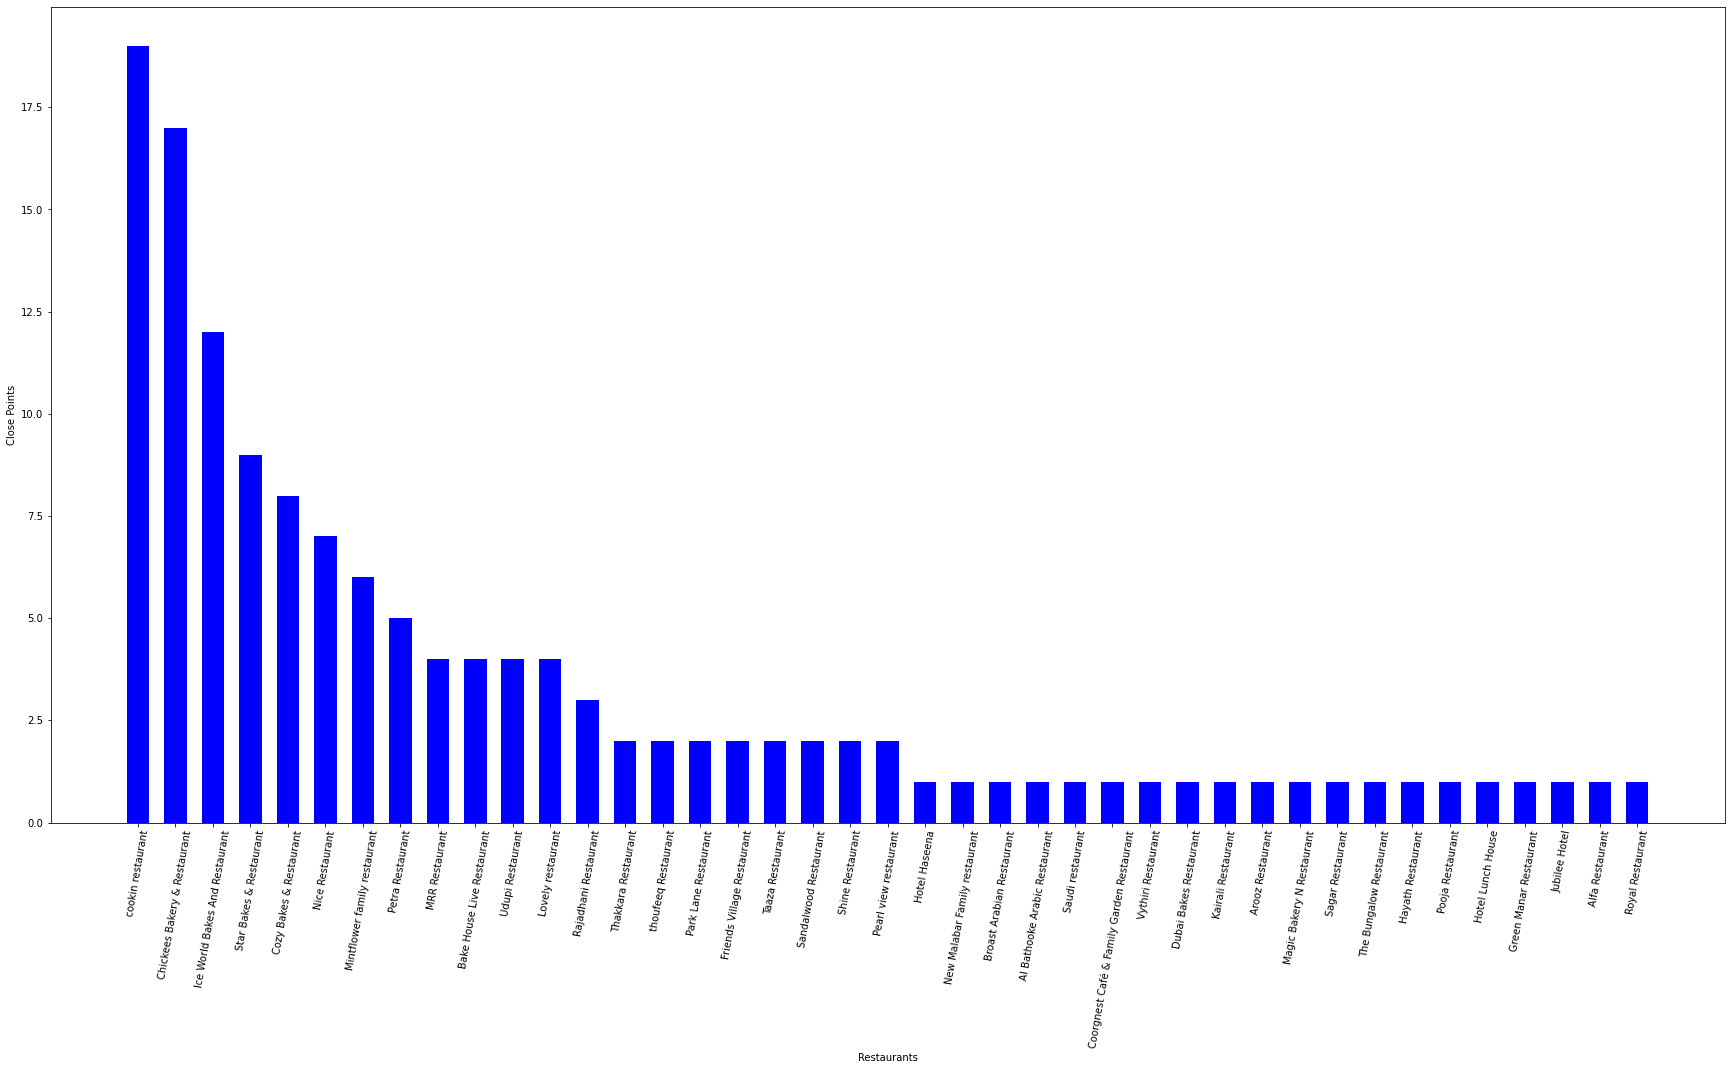

In [44]:
restaurants = restau_freq["Restaurant Name"]
closePoints = restau_freq["Close to points"]
  
fig = plt.figure(figsize=(30, 15))
  
# creating the bar plot
plt.bar(restaurants, closePoints, color='blue', width=0.6)
  
plt.xlabel("Restaurants")
plt.xticks(rotation=80)
plt.ylabel("Close Points")
plt.show()